# BayesianRidgeRegression with RobustScaler & QuantileTransformer

This code template can be used for the regression analysis using BayesianRidgeRegression Algorithm with data Rescaling and Feature Transformation techniques RobustScaler and QuantileTransformer respectively.

### Required Packages

In [26]:
import warnings as wr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, PowerTransformer,QuantileTransformer,RobustScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
wr.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [29]:
#filepath
file_path= ""

List of features which are  required for model training.

In [30]:
#features
features=[]

Target feature for prediction.

In [31]:
#target
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [32]:
df=pd.read_csv(file_path)
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [33]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [34]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [35]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,time,coherence,align_dots,align_sacc,choice_T1,choice_T2
0,-80,0.0,1,0,1,0
1,-80,3.2,1,0,1,0
2,-80,6.4,1,0,1,0
3,-80,12.8,1,0,1,0
4,-80,25.6,1,0,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

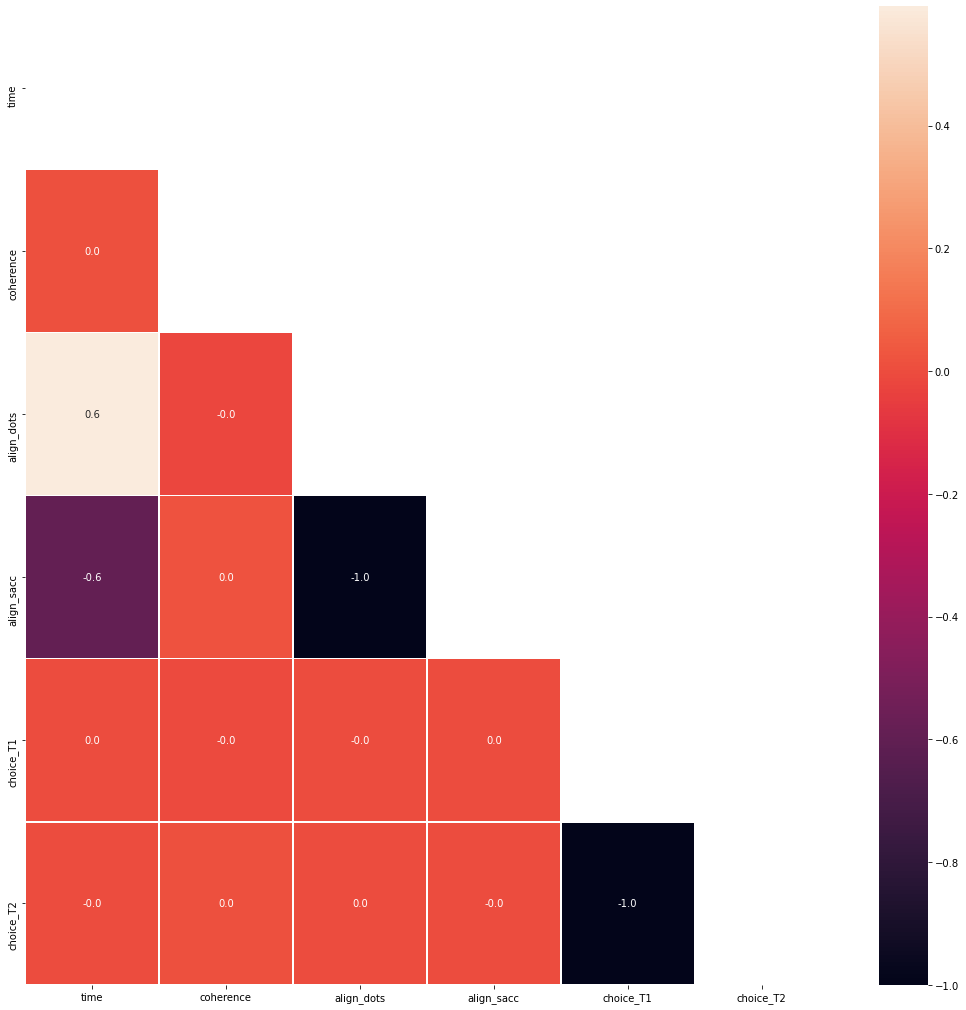

In [36]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Data Rescaling
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

[For more Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

### Model

Bayesian ridge regression.

Fit a Bayesian ridge model. See the Notes section for details on this implementation and the optimization of the regularization parameters lambda (precision of the weights) and alpha (precision of the noise).

Model Tuning Parameters
>**n_iterint, default=300**
Maximum number of iterations. Should be greater than or equal to 1.

>**tolfloat, default=1e-3**
Stop the algorithm if w has converged.

>**alpha_1float, default=1e-6**
Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter.

>**alpha_2float, default=1e-6**
Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

>**lambda_1float, default=1e-6**
Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter.

>**lambda_2float, default=1e-6**
Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

>**alpha_initfloat, default=None**
Initial value for alpha (precision of the noise). If not set, alpha_init is 1/Var(y).

[For more Reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html)

### Quantile Transformer

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

For Reference:-

[QuantileTransformer API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

In [38]:
model=make_pipeline(RobustScaler(),QuantileTransformer(), BayesianRidge())
model.fit(x_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('bayesianridge', BayesianRidge())])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [39]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 15.85 %



In [40]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 15.85 %
Mean Absolute Error 8.26
Mean Squared Error 131.81


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.


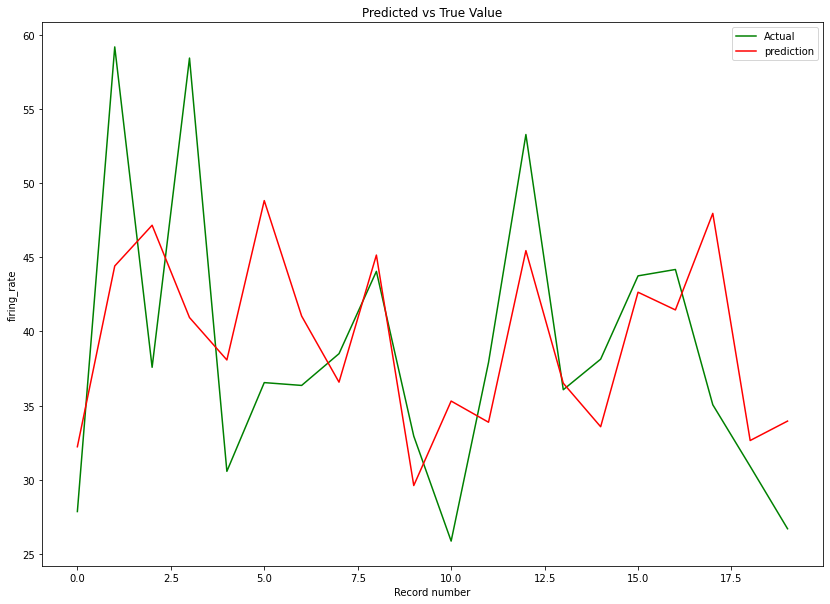

In [41]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Jay Shimpi, Github: [Profile](https://github.com/JayShimpi22)